In [52]:
import plotly
import folium
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.shape

(1000, 17)

In [4]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [5]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [6]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [17]:
df.groupby('Branch').City.unique()

Branch
A       [Yangon]
B     [Mandalay]
C    [Naypyitaw]
Name: City, dtype: object

In [18]:
df.groupby(['Product line'])['Unit price'].mean()

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

<AxesSubplot:title={'center':'Daily total samount of sales'}, xlabel='Date', ylabel='Total amount'>

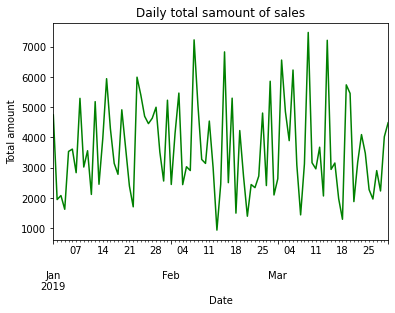

In [20]:
#лінійний графік суми усіх покупок за кожен день
df.groupby('Date')['Total'].sum().plot(ylabel='Total amount',
                                       title='Daily total samount of sales', color='g')

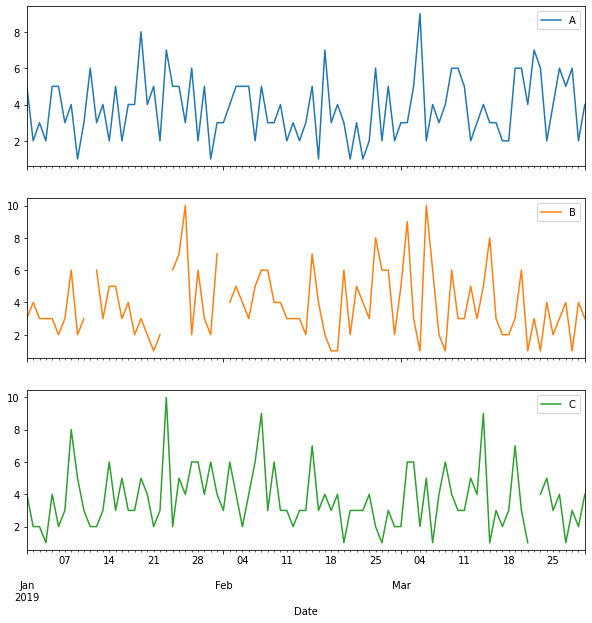

In [21]:
#динаміка кожного з магазинів
df.pivot_table(index='Date', columns='Branch', values='Invoice ID', aggfunc='count').plot(figsize=(10,10), subplots=True);

Який процент використання кожного способу оплати?

In [23]:
grouped = df.pivot_table(index='Payment', columns='City', values='Invoice ID', aggfunc='count')

In [25]:
grouped

City,Mandalay,Naypyitaw,Yangon
Payment,,,
Cash,110,124,110
Credit card,109,98,104
Ewallet,113,106,126


In [27]:
grouped = grouped/grouped.sum()*100

In [28]:
grouped.style.background_gradient(axis=1)

City,Mandalay,Naypyitaw,Yangon
Payment,,,
Cash,33.132530,37.804878,32.352941
Credit card,32.831325,29.878049,30.588235
Ewallet,34.036145,32.317073,37.058824


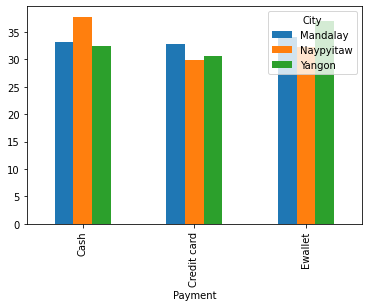

In [49]:
bar_groupped_plot = grouped.plot(kind = 'bar')

## Подивимося на розподіл цін на товари

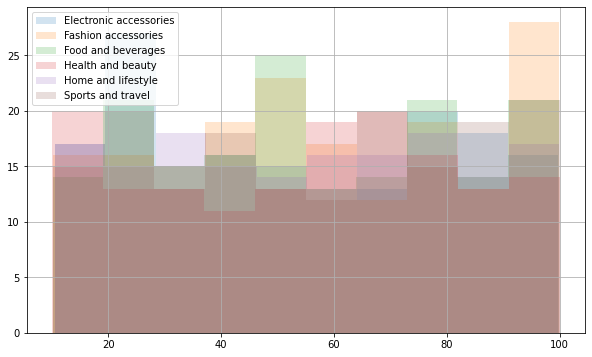

In [43]:
df.groupby('Product line')['Unit price'].hist(alpha=0.2, legend=True, figsize=(10,6), bins=10);

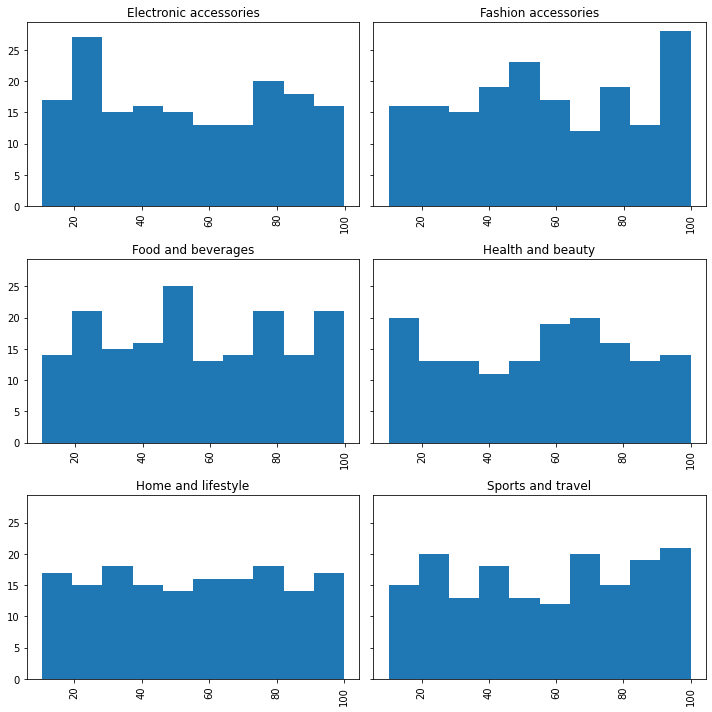

In [71]:
df.hist(column='Unit price', by='Product line', figsize=(10, 10), sharey=True)
plt.tight_layout()

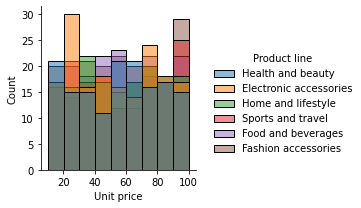

In [44]:
#через seaborn
sns.displot(df, x="Unit price", hue="Product line", binwidth=10, height=3)

In [45]:
# аналітично
df['bin'] = pd.cut(df['Unit price'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
pvtdf = df.pivot_table(index='Product line', columns=['bin'], values='Unit price',
                       aggfunc=('count')).fillna(0)
pvtdf.style.background_gradient(axis=1)

bin,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
Product line,,,,,,,,,
Electronic accessories,17,30,16,18,16,14,24,17,18
Fashion accessories,19,15,21,20,22,17,18,17,29
Food and beverages,16,21,18,22,23,12,21,19,22
Health and beauty,21,15,15,11,21,20,17,17,15
Home and lifestyle,17,16,22,17,14,18,20,18,18
Sports and travel,16,21,16,19,12,20,20,17,25


## Чи є залежність між ціною та рейтингом товарів групи "Health and beauty"?

<AxesSubplot:xlabel='Unit price', ylabel='Rating'>

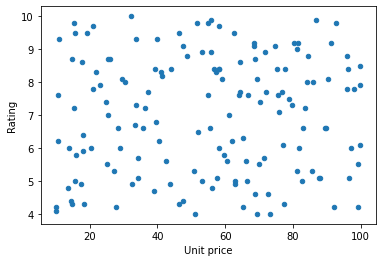

In [72]:
df[df["Product line"]=="Health and beauty"].plot.scatter(x='Unit price', y='Rating')


>не бачимо лінійних залежностей на графіку розсіяння, отже залежності немає.

In [73]:
df[df["Product line"]=="Health and beauty"][['Unit price', 'Rating']].corr()

,Unit price,Rating
Unit price,1.000000,0.051836
Rating,0.051836,1.000000


<AxesSubplot:>

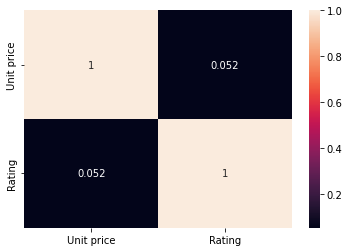

In [75]:
heath_beauty_df = df[df["Product line"] == "Health and beauty"]
sns.heatmap(heath_beauty_df[['Unit price', 'Rating']].corr(), annot=True)

> Коефіцієнт кореляції менше 0.2 - отже, залежності немає.

## Мапа

In [178]:
map_london= folium.Map(location=[51.5074, 0.1278],
                        zoom_start=9)
# Simple marker
folium.Marker([51.5079, 0.0877],
              popup='London Bridge',
              icon=folium.Icon(color='green')
              ).add_to(map_london)

# Circle marker
folium.CircleMarker([51.4183, 0.2206],
                    radius=30,
                    popup='East London',
                    color='red',
                    ).add_to(map_london)

map_london


## Хмара слів

In [162]:
from wordcloud import WordCloud, STOPWORDS

In [164]:
text = open('alice.txt', 'r')
text = text.read()

In [165]:
stopwords = set(STOPWORDS)

In [167]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords)

In [169]:
alice_wc.generate(text)

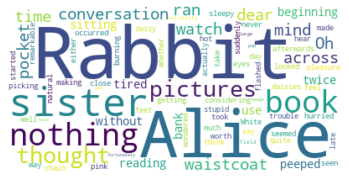

In [170]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [189]:
import numpy as np
from PIL import Image

# зберігаємо маску
star_mask = np.array(Image.open('D:\Git\Lab.Visualisation\star1.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


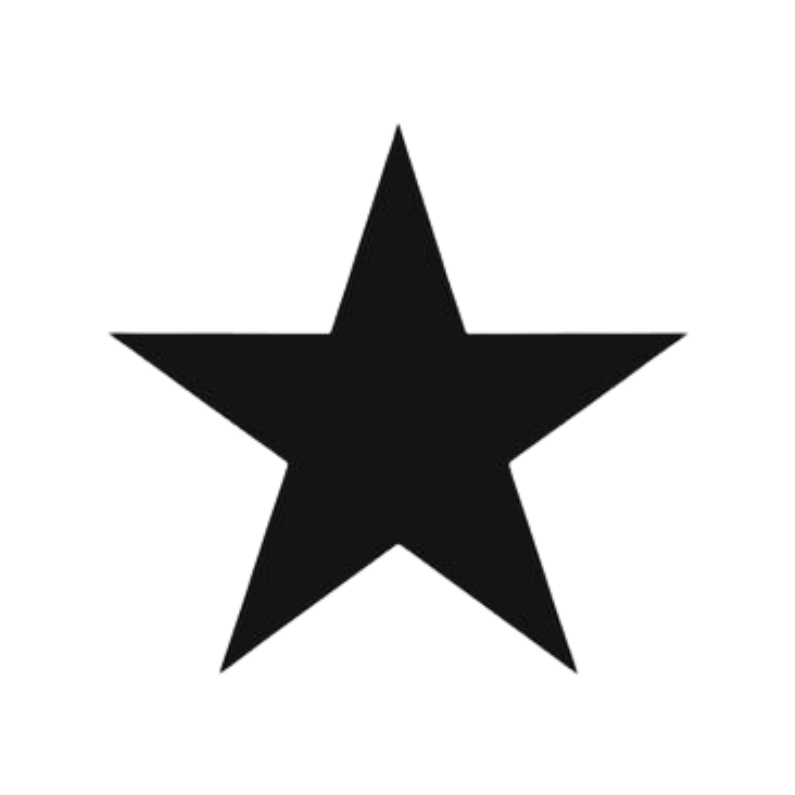

In [190]:
fig = plt.figure()
fig.set_figwidth(14)  # встановіть ширину
fig.set_figheight(18)  # встановіть висоту

plt.imshow(star_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

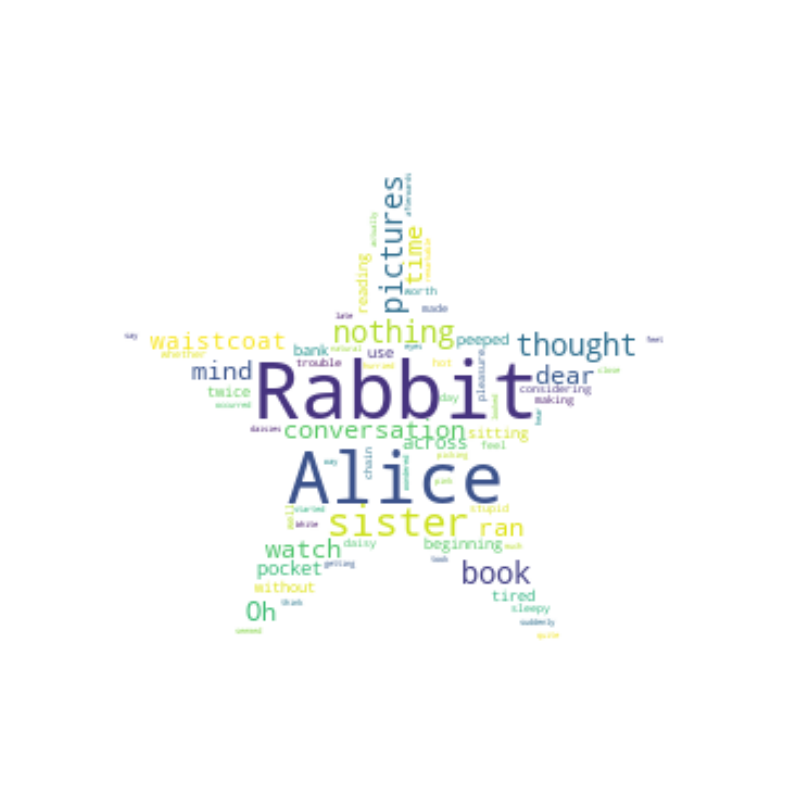

In [193]:
# створюємо екземпляр об'єкта WordCloud
alice_wc = WordCloud(background_color='white', max_words=2000,
                     mask=star_mask, stopwords=stopwords)

# генеруємо словохмару
alice_wc.generate(text)

fig = plt.figure()
fig.set_figwidth(14)  # встановіть ширину
fig.set_figheight(18)  # встановіть висоту

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
